#PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE  ́
#Facultad de Matemática
#EPG4001 - Aprendizaje Supervisado
##Profesor: Jonathan Acosta
##Alumno: Ronald Castillo
###Fecha de entrega: 29/06/2021 a las 18:00 horas



##Laboratorio N°1
##Primer bimestre, 2022

__Objetivo__: Ajustar una regresión lineal y una regresión logística en R e interpretar sus resultados.


__Preguntas parte 1:__ (30 puntos) Utilice el conjunto de datos "chicago" disponibles en la librería "faraway". Considere $Y = involact$ como variable respuesta, todas las demás serán variables explicativas.


In [1]:
#Libreria a instalar
install.packages("faraway")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘lme4’




1. Realizar una análisis descriptivo de las variables de la base de datos. Debe incluir indicadores y gráficas.

En el siguiente codigo, se puede ver una parte de la `data`. 

In [8]:
library(faraway)
head(faraway::chicago)

race fire theft age  volact involact income
60626 10.0  6.2 29    60.4 5.3    0.0      11744 
60640 22.2  9.5 44    76.5 3.1    0.1       9323 
60613 19.6 10.5 36    73.5 4.8    1.2       9948 
60657 17.3  7.7 37    66.9 5.7    0.5      10656 
60614 24.5  8.6 53    81.4 5.9    0.7       9730 
60610 54.0 34.1 68    52.6 4.0    0.3       8231

A continuación se puede apreciar el promedio de las columnas, como se ve la columna `income` es la variable con una mayor orden de magnitud vs las otras columnas.

In [15]:
colMeans(faraway::chicago)

race         fire        theft          age       volact     involact 
3.498511e+01 1.227872e+01 3.236170e+01 6.032766e+01 6.529787e+00 6.148936e-01 
      income 
1.069583e+04

Tambien se puede apreciar, que la varianza de esta ultima columna, es la que tiene mayor valor, seguido de la variable `race`.

In [17]:
var(faraway::chicago)

race         fire          theft         age          volact    
race       1061.95260    179.699241    185.281591    184.29259  -98.16129
fire        179.69924     86.532146    115.333950     86.56604  -25.32914
theft       185.28159    115.333950    496.888067    159.83760  -27.55231
age         184.29259     86.566036    159.837604    509.62900  -54.24019
volact      -98.16129    -25.329135    -27.552313    -54.24019   15.73301
involact     14.74240      4.145106      2.114061      6.80697   -1.87654
income   -63161.95259 -15639.851526 -10616.371878 -32870.51475 8204.04866
         involact      income     
race        14.7424006  -63161.953
fire         4.1451064  -15639.852
theft        2.1140611  -10616.372
age          6.8069704  -32870.515
volact      -1.8765402    8204.049
involact     0.4017299   -1160.604
income   -1160.6039315 7585606.666

A continuacion seguido de la matriz de covarianza de las variables, lo natural es analizar la correlacion entre las variables, por lo que se puede apreciar tanto en la siguiente matriz de correlacion, como en la grafica de abajo, que hay una alta correlacion entre las variables `volact` y la variable `income`, que tienen una correlacion de un _75%_, ademas de que en las graficas se ven casi una linea recta. 

In [18]:
cor(faraway::chicago)

race       fire       theft      age        volact     involact  
race      1.0000000  0.5927956  0.2550647  0.2505118 -0.7594196  0.7137540
fire      0.5927956  1.0000000  0.5562105  0.4122225 -0.6864766  0.7030397
theft     0.2550647  0.5562105  1.0000000  0.3176308 -0.3116183  0.1496309
age       0.2505118  0.4122225  0.3176308  1.0000000 -0.6057428  0.4757291
volact   -0.7594196 -0.6864766 -0.3116183 -0.6057428  1.0000000 -0.7464229
involact  0.7137540  0.7030397  0.1496309  0.4757291 -0.7464229  1.0000000
income   -0.7037328 -0.6104481 -0.1729226 -0.5286695  0.7509780 -0.6648471
         income    
race     -0.7037328
fire     -0.6104481
theft    -0.1729226
age      -0.5286695
volact    0.7509780
involact -0.6648471
income    1.0000000

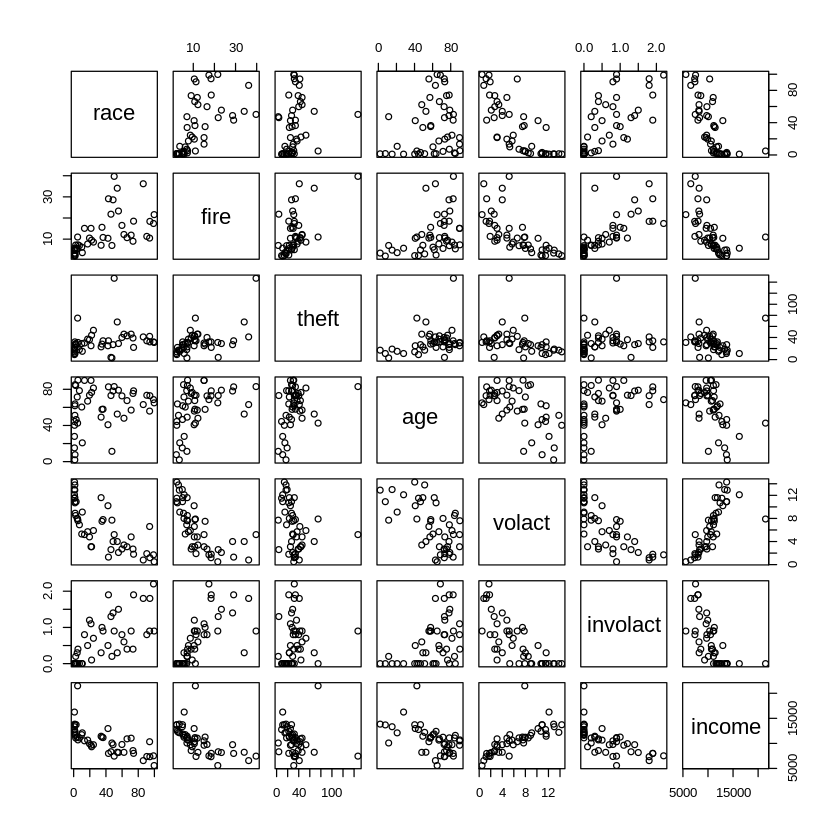

In [9]:
plot(faraway::chicago)

Finalmente, podriamos ver con la funcion `summary` los valores extremos, los cuartiles, el promedio y la mediana de cada variable, como habiamos dicho que la variable `income`es la que tiene mayor valor de magnitud, tambien podemos decir que ninguna variable esta centrada, ya que su promedio y mediana difieren, pero la que mas difiere es la variable `race`. 

In [20]:
summary(faraway::chicago)

      race            fire           theft             age       
 Min.   : 1.00   Min.   : 2.00   Min.   :  3.00   Min.   : 2.00  
 1st Qu.: 3.75   1st Qu.: 5.65   1st Qu.: 22.00   1st Qu.:48.60  
 Median :24.50   Median :10.40   Median : 29.00   Median :65.00  
 Mean   :34.99   Mean   :12.28   Mean   : 32.36   Mean   :60.33  
 3rd Qu.:57.65   3rd Qu.:16.05   3rd Qu.: 38.00   3rd Qu.:77.30  
 Max.   :99.70   Max.   :39.70   Max.   :147.00   Max.   :90.10  
     volact         involact          income     
 Min.   : 0.50   Min.   :0.0000   Min.   : 5583  
 1st Qu.: 3.10   1st Qu.:0.0000   1st Qu.: 8447  
 Median : 5.90   Median :0.4000   Median :10694  
 Mean   : 6.53   Mean   :0.6149   Mean   :10696  
 3rd Qu.: 9.65   3rd Qu.:0.9000   3rd Qu.:11989  
 Max.   :14.30   Max.   :2.2000   Max.   :21480  


2. Utilizando alguno de los criterios de selección de variables determine el modelo lineal que mejor ajusta a la variable respuesta. Indique el criterio utilizado.

En el siguiente codigo, se puede ver que se ocupa el Criterio de información de Akaike (AIC), en la funcion de paso a paso, para mejorar la regresion lineal.

In [79]:
reg1=step(lm(involact~., data=faraway::chicago))
summary(reg1)

Start:  AIC=-95.34
involact ~ race + fire + theft + age + volact + income

         Df Sum of Sq    RSS     AIC
- volact  1   0.01546 4.6047 -97.184
- income  1   0.07300 4.6622 -96.601
<none>                4.5892 -95.342
- age     1   0.59993 5.1892 -91.568
- race    1   1.01743 5.6067 -87.931
- theft   1   1.40048 5.9897 -84.825
- fire    1   2.02990 6.6191 -80.129

Step:  AIC=-97.18
involact ~ race + fire + theft + age + income

         Df Sum of Sq    RSS     AIC
- income  1   0.06710 4.6718 -98.504
<none>                4.6047 -97.184
- age     1   0.99296 5.5977 -90.007
- theft   1   1.46328 6.0680 -86.215
- race    1   1.74657 6.3513 -84.070
- fire    1   2.37807 6.9828 -79.615

Step:  AIC=-98.5
involact ~ race + fire + theft + age

        Df Sum of Sq    RSS     AIC
<none>               4.6718 -98.504
- age    1   0.99734 5.6691 -91.410
- theft  1   1.41436 6.0862 -88.074
- race   1   2.05375 6.7256 -83.379
- fire   1   2.38365 7.0554 -81.128



Call:
lm(formula = involact ~ race + fire + theft + age, data = faraway::chicago)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87108 -0.14830 -0.01961  0.19968  0.81638 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.243118   0.145054  -1.676 0.101158    
race         0.008104   0.001886   4.297 0.000100 ***
fire         0.036646   0.007916   4.629 3.51e-05 ***
theft       -0.009592   0.002690  -3.566 0.000921 ***
age          0.007210   0.002408   2.994 0.004595 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3335 on 42 degrees of freedom
Multiple R-squared:  0.7472,	Adjusted R-squared:  0.7231 
F-statistic: 31.03 on 4 and 42 DF,  p-value: 4.799e-12


3. Analice la significancia del modelo obtenido luego del proceso de selección, y responda si
* ¿Es el modelo obtenido significativo?
  
  _R:_ En el `summary`del ejercicio anterior, da un $R^2$ de 0.74, lo que no es un buen modelo significativo.

* ¿Existe alguna covariable no significativa?
  
  _R:_ En el `summary`del ejercicio anterior, se puede ver que todas las variable son significativas.

* ¿En caso de existir alguna covariable no significativa, la quitaría del modelo?. Fundamente.

  _R:_ En el `summary`del ejercicio anterior, se puede ver que la variable menos significativa es el intercepto. Pero no se puede quitar, ya que es una variable instrinseca del modelo.

4. Fijar al menos 5 valores para las covariables del modelo y con ellas realizar la predicción de la media y la predicción individual de la variable objetivo (incluir los intervalos de confianza).

In [250]:
### Predicciones con Intervalos de confianza
k<-5
n<-attr(reg1$terms,"term.labels")
r<-sample(rownames(chicago),k)
chi<-chicago[r,]
C<-rbind(chi,colMeans(chicago))
rownames(C)[k+1]<-'media'
P<-predict(reg1, C[,n], interval = 'prediction') # Modelo adecuado
cbind(P,C['involact'])
###  Intervalos de confianza de las variables
confint.default(reg1, level=0.95)

fit         lwr         upr       involact 
60617 0.539671492 -0.14127826 1.2206212 0.9000000
60651 0.778518038  0.07514365 1.4818924 0.8000000
60618 0.419607322 -0.28689867 1.1261133 0.4000000
60631 0.001966931 -0.69058558 0.6945194 0.0000000
60626 0.222429899 -0.46330544 0.9081652 0.0000000
media 0.614893617 -0.06529265 1.2950799 0.6148936

2.5 %        97.5 %      
(Intercept) -0.527417831  0.041182239
race         0.004407270  0.011799893
fire         0.021130556  0.052162321
theft       -0.014865003 -0.004319992
age          0.002490708  0.011929371

__Preguntas parte 2:__ (30 puntos) Utilice el conjunto de datos "wbca" disponibles en la librería "faraway". Además, considere $Y = Class$ como la variable respuesta, todas las demás serán variables explicativas.



1. Realizar una análisis descriptivo de las variables de la base de datos. Debe incluir indicadores y gráficas.

En el siguiente codigo, se puede ver una parte de la `data`. 

In [68]:
library(faraway)
data<-faraway::wbca
head(faraway::wbca)

Class Adhes BNucl Chrom Epith Mitos NNucl Thick UShap USize
1 1     1      1    3     2     1     1     5      1     1   
2 1     5     10    3     7     1     2     5      4     4   
3 1     1      2    3     2     1     1     3      1     1   
4 1     1      4    3     3     1     7     6      8     8   
5 1     3      1    3     2     1     1     4      1     1   
6 0     8     10    9     7     1     7     8     10    10

Tambien se puede apreciar, una descripccion de la data.

In [192]:
summary(faraway::wbca)

     Class            Adhes            BNucl            Chrom       
 Min.   :0.0000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.:0.0000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 2.000  
 Median :1.0000   Median : 1.000   Median : 1.000   Median : 3.000  
 Mean   :0.6505   Mean   : 2.816   Mean   : 3.542   Mean   : 3.433  
 3rd Qu.:1.0000   3rd Qu.: 4.000   3rd Qu.: 6.000   3rd Qu.: 5.000  
 Max.   :1.0000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
     Epith            Mitos            NNucl            Thick       
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 2.000  
 Median : 2.000   Median : 1.000   Median : 1.000   Median : 4.000  
 Mean   : 3.231   Mean   : 1.604   Mean   : 2.859   Mean   : 4.436  
 3rd Qu.: 4.000   3rd Qu.: 1.000   3rd Qu.: 4.000   3rd Qu.: 6.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
     UShap            USize      


Tambien en la grafica, se puede apreciar que no tienen mucha correlacion lineal entre los datos.

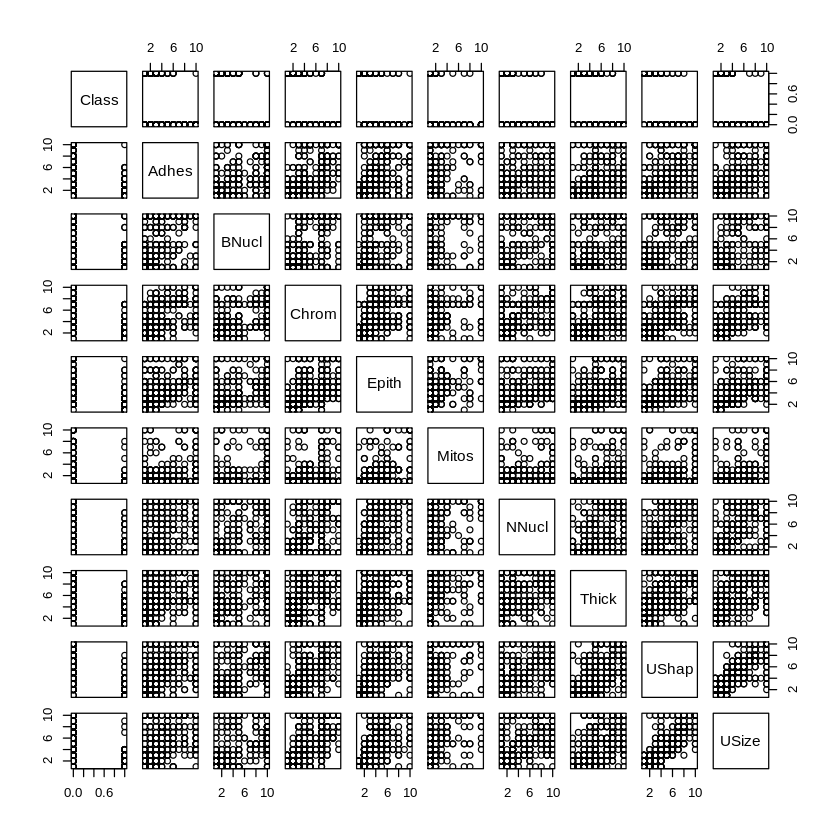

In [193]:
plot(faraway::wbca)

2. Utilizando alguno de los criterios de selección de variables determine el modelo de regresión logística que mejor ajusta a la variable respuesta. Indique el criterio utilizado.

In [194]:
log1=step(glm(Class~., data=faraway::wbca, family=binomial))
summary(log1)

Start:  AIC=109.46
Class ~ Adhes + BNucl + Chrom + Epith + Mitos + NNucl + Thick + 
    UShap + USize

        Df Deviance    AIC
- USize  1   89.523 107.52
- Epith  1   89.613 107.61
- UShap  1   90.627 108.63
<none>       89.464 109.46
- Mitos  1   93.551 111.55
- NNucl  1   95.204 113.20
- Adhes  1   98.844 116.84
- Chrom  1   99.841 117.84
- BNucl  1  109.000 127.00
- Thick  1  110.239 128.24

Step:  AIC=107.52
Class ~ Adhes + BNucl + Chrom + Epith + Mitos + NNucl + Thick + 
    UShap

        Df Deviance    AIC
- Epith  1   89.662 105.66
- UShap  1   91.355 107.36
<none>       89.523 107.52
- Mitos  1   93.552 109.55
- NNucl  1   95.231 111.23
- Adhes  1   99.042 115.04
- Chrom  1  100.153 116.15
- BNucl  1  109.064 125.06
- Thick  1  110.465 126.47

Step:  AIC=105.66
Class ~ Adhes + BNucl + Chrom + Mitos + NNucl + Thick + UShap

        Df Deviance    AIC
<none>       89.662 105.66
- UShap  1   91.884 105.88
- Mitos  1   93.714 107.71
- NNucl  1   95.853 109.85
- Adhes  1  100.12


Call:
glm(formula = Class ~ Adhes + BNucl + Chrom + Mitos + NNucl + 
    Thick + UShap, family = binomial, data = faraway::wbca)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.44161  -0.01119   0.04962   0.09741   3.08205  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  11.0333     1.3632   8.094 5.79e-16 ***
Adhes        -0.3984     0.1294  -3.080  0.00207 ** 
BNucl        -0.4192     0.1020  -4.111 3.93e-05 ***
Chrom        -0.5679     0.1840  -3.085  0.00203 ** 
Mitos        -0.6456     0.3634  -1.777  0.07561 .  
NNucl        -0.2915     0.1236  -2.358  0.01837 *  
Thick        -0.6216     0.1579  -3.937 8.27e-05 ***
UShap        -0.2541     0.1785  -1.423  0.15461    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 881.388  on 680  degrees of freedom
Residual deviance:  89.662  on 673  degrees of freedom
AIC: 105.66

Numbe

3. Analice la significancia del modelo obtenido luego del proceso de selección, y responda si

* ¿Es el modelo obtenido significativo?

  _R:_ Es significativo, por que la devianza nula es mucho mayor que la residual.

* ¿Existe alguna covariable no significativa?
  
  _R:_ Si las variables `Mitos` y `UShap`.

* ¿En caso de existir alguna covariable no significativa, la quitaría del modelo?. Fundamente.

  _R:_ No se pueden quitar del modelo, ya que se empeoraria el AIC.
  

4. Fijar al menos 5 valores para las covariables del modelo y con ellas realizar la predicción de la probabilidad de presencia (incluir los intervalos de confianza).

In [283]:
### Intervalos de confianza de las covariables
confint.default(log1, level=0.95)

2.5 %      97.5 %     
(Intercept)  8.3615066 13.70515770
Adhes       -0.6519565 -0.14490519
BNucl       -0.6190357 -0.21935844
Chrom       -0.9285735 -0.20712955
Mitos       -1.3578036  0.06657864
NNucl       -0.5338499 -0.04921541
Thick       -0.9311288 -0.31212640
UShap       -0.6038995  0.09576752

In [344]:
### Intervalos de confianza de la prediccion
k<-5
n<-attr(log1$terms,"term.labels")
r<-sample(rownames(wbca),k)
C<-wbca[r,]


pred.link=predict(log1, C[,n], type = "link", se.fit=TRUE)
aux.LI2=pred.link$fit-qnorm(0.975)*pred.link$se.fit
aux.LS2=pred.link$fit+qnorm(0.975)*pred.link$se.fit

LI2=exp(aux.LI2)/(1+exp(aux.LI2))
LS2=exp(aux.LS2)/(1+exp(aux.LS2))

pred.resp=predict(log1, C[,n], type = "response", se.fit=TRUE)
LI1=pred.resp$fit-qnorm(0.975)*pred.resp$se.fit
LS1=pred.resp$fit+qnorm(0.975)*pred.resp$se.fit

Y1<-cbind(LI1,LS1,C['Class'])
Y2<-cbind(LI2,LS2,C['Class'])
A1<-cbind(Y1[Y1$Class==0,'LI1'],Y2[Y2$Class==0,c('LS2','Class')])
A2<-cbind(Y2[Y2$Class==1,'LI2'],Y1[Y1$Class==1,c('LS1','Class')])
colnames(A1)<-c('2.5%','97.5%','Class')
colnames(A2)<-c('2.5%','97.5%','Class')

Y<-data.frame(rbind(A1,A2))
colnames(Y)<-c('2.5%','97.5%','Class')
Y

2.5%          97.5%       Class
215 -8.524387e-05 0.001082488 0    
51  -2.880249e-03 0.021590698 0    
30   9.908075e-01 1.000822166 1    
516  9.807310e-01 1.001220958 1    
453  9.898575e-01 1.000982711 1